# Task 5 : Stock Market Prediction using Numerical and Textual Analysis

### Name : Sampada Suryawanshi

### Objective : Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

In [1]:
##Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math as ma
warnings.filterwarnings("ignore")
import pandas_datareader as web


In [2]:
!pip3 install pandas_datareader 

In [3]:
df=web.DataReader('AAPL',data_source='yahoo')

In [4]:
df.to_csv('AAP.csv')
df.head(10)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-21,28.895000,28.424999,28.500000,28.440001,167180800.0,26.281809
2015-10-22,28.875000,28.525000,28.582500,28.875000,166616400.0,26.683798
2015-10-23,29.807501,29.082500,29.174999,29.770000,237467600.0,27.510878
2015-10-26,29.532499,28.730000,29.520000,28.820000,265335200.0,26.632969
2015-10-27,29.135000,28.497499,28.850000,28.637501,279537600.0,26.464319
2015-10-28,29.825001,29.014999,29.232500,29.817499,342205600.0,27.554773
2015-10-29,30.172501,29.567499,29.674999,30.132500,204909200.0,27.845867
2015-10-30,30.305000,29.862499,30.247499,29.875000,197461200.0,27.607912
2015-11-02,30.340000,29.902500,30.200001,30.295000,128813200.0,27.996040


In [5]:
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-07,115.550003,114.129997,114.620003,115.080002,96849000.0,115.080002
2020-10-08,116.400002,114.589996,116.250000,114.970001,83477200.0,114.970001
2020-10-09,117.000000,114.919998,115.279999,116.970001,100506900.0,116.970001
2020-10-12,125.180000,119.279999,120.059998,124.400002,240226800.0,124.400002
2020-10-13,125.389999,119.650002,125.269997,121.099998,262330500.0,121.099998
2020-10-14,123.029999,119.620003,121.000000,121.190002,151062300.0,121.190002
2020-10-15,121.199997,118.150002,118.720001,120.709999,112559200.0,120.709999
2020-10-16,121.550003,118.809998,121.279999,119.019997,115393800.0,119.019997
2020-10-19,120.419998,115.660004,119.959999,115.980003,120221600.0,115.980003


In [6]:
len(df)

1259

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
print("Dimension of Df  is:",df.shape)
###(rows,coloum)

Dimension of Df  is: (1259, 6)


In [9]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [10]:
print(" Here we are checking the DataTypes of various features from our df","\n")
df.info() 

 Here we are checking the DataTypes of various features from our df 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2015-10-21 to 2020-10-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   float64
 5   Adj Close  1259 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


In [11]:
df.isna()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-21,False,False,False,False,False,False
2015-10-22,False,False,False,False,False,False
2015-10-23,False,False,False,False,False,False
2015-10-26,False,False,False,False,False,False
2015-10-27,False,False,False,False,False,False
...,...,...,...,...,...,...
2020-10-14,False,False,False,False,False,False
2020-10-15,False,False,False,False,False,False
2020-10-16,False,False,False,False,False,False


In [12]:
# Dealing with null values
df.isna().sum()
print("Total count of missing values in our dataset is: ",df.isna().sum().sum())

Total count of missing values in our dataset is:  0


###### As we can see that there are no missing values in our dataset.
 

In [13]:
# Describing the data
print("Getting some insights about features using descriptive statistics of ","\n")
df.describe()

Getting some insights about features using descriptive statistics of  



,High,Low,Open,Close,Volume,Adj Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,48.554307,47.547848,48.042186,48.077933,1.350401e+08,46.925943
std,22.522661,21.748650,22.174605,22.156289,6.313128e+07,22.640798
min,22.917500,22.367500,22.500000,22.584999,1.402232e+07,21.202499
25%,30.452499,30.112500,30.243750,30.316250,9.383620e+07,28.461563
50%,43.575001,42.882500,43.200001,43.200001,1.180716e+08,41.922394
75%,55.240002,54.147499,54.566250,54.571251,1.604740e+08,53.404438
max,137.979996,130.529999,137.589996,134.179993,5.334788e+08,134.179993


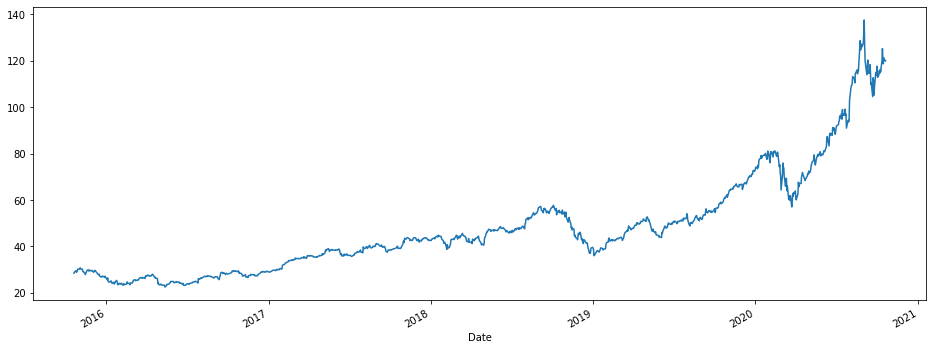

In [14]:
df['Open'].plot(figsize=(16,6))

In [15]:
df1=df.reset_index()['Close']

In [16]:
df1.shape

(1259,)

In [17]:
df1

0        28.440001
1        28.875000
2        29.770000
3        28.820000
4        28.637501
           ...    
1254    121.190002
1255    120.709999
1256    119.019997
1257    115.980003
1258    116.379997
Name: Close, Length: 1259, dtype: float64

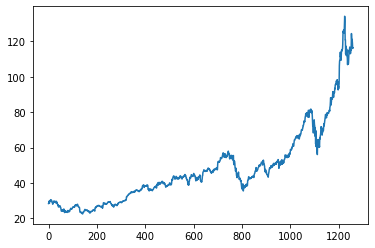

In [18]:
plt.plot(df1)

Stock price up and down movement.

## Predict Stock Price Movement Based On News Headline using NLP 

In [19]:
import pandas as pd

##### The data is consieration is a combination of the world news and stock price shifts 

In [20]:
df=pd.read_csv('C:\\Users\\dell\\Documents\\stock prediction data.csv', encoding = "ISO-8859-1")

In [21]:
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,08/08/2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,11/08/2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,12/08/2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,13/08/2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,14/08/2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

### class 0 =The stock price stayed the same or decreased.
### class 1 =The stock price increased.

In [22]:
##Divided dataset in train and test
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [23]:
# Removing punctuations
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,b Georgia downs two Russian warplanes as cou...,b BREAKING Musharraf to be impeached,b Russia Today Columns of troops roll into So...,b Russian tanks are moving towards the capital...,b Afghan children raped with impunity U N ...,b Russian tanks have entered South Ossetia...,b Breaking Georgia invades South Ossetia Rus...,b The enemy combatent trials are nothing but...,b Georgian troops retreat from S Osettain cap...,b Did the U S Prep Georgia for War with Russia,...,b Georgia Invades South Ossetia if Russia ge...,b Al Qaeda Faces Islamist Backlash,b Condoleezza Rice The US would not act to p...,b This is a busy day The European Union has ...,b Georgia will withdraw soldiers from Ir...,b Why the Pentagon Thinks Attacking Iran is a ...,b Caucasus in crisis Georgia invades South Os...,b Indian shoe manufactory And again in a se...,b Visitors Suffering from Mental Illnesses Ban...,b No Help for Mexico s Kidnapping Surge
1,b Why wont America and Nato help us If they w...,b Bush puts foot down on Georgian conflict,b Jewish Georgian minister Thanks to Israeli ...,b Georgian army flees in disarray as Russians ...,b Olympic opening ceremony fireworks faked,b What were the Mossad with fraudulent New Zea...,b Russia angered by Israeli military sale to G...,b An American citizen living in S Ossetia blam...,b Welcome To World War IV Now In High Definit...,b Georgia s move a mistake of monumental prop...,...,b Israel and the US behind the Georgian aggres...,b Do not believe TV neither Russian nor Geor...,b Riots are still going on in Montreal Canada...,b China to overtake US as largest manufacturer,b War in South Ossetia PICS,b Israeli Physicians Group Condemns State Tort...,b Russia has just beaten the United States ov...,b Perhaps the question about the Georgia R...,b Russia is so much better at war,b So this is what it s come to trading sex fo...
2,b Remember that adorable year old who sang a...,b Russia ends Georgia operation,b If we had no sexual harassment we would hav...,b Al Qa eda is losing support in Iraq because ...,b Ceasefire in Georgia Putin Outmaneuvers the...,b Why Microsoft and Intel tried to kill the XO...,b Stratfor The Russo Georgian War and the Bal...,b I m Trying to Get a Sense of This Whole Geor...,b The US military was surprised by the timing ...,b U S Beats War Drum as Iran Dumps the Dollar,...,b U S troops still in Georgia did you know t...,b Why Russias response to Georgia was right,b Gorbachev accuses U S of making a serious ...,b Russia Georgia and NATO Cold War Two,b Remember that adorable year old who led y...,b War in Georgia The Israeli connection,b All signs point to the US encouraging Georgi...,b Christopher King argues that the US and NATO...,b America The New Mexico,b BBC NEWS Asia Pacific Extinction by man...
3,b U S refuses Israel weapons to attack Iran ...,b When the president ordered to attack Tskhinv...,b Israel clears troops who killed Reuters cam...,b Britain s policy of being tough on drugs is...,b Body of year old found in trunk Latest ...,b China has moved million quake survivors...,b Bush announces Operation Get All Up In Russi...,b Russian forces sink Georgian ships,b The commander of a Navy air reconnaissance s...,b of CNN readers Russia s actions in Geor...,...,b Elephants extinct by,b US humanitarian missions soon in Georgia i...,b Georgia s DDOS came from US sources,b Russian convoy heads into Georgia violating...,b Israeli defence minister US against strike ...,b Gorbachev We Had No Choice,b Witness Russian forces head towards Tbilisi...,b Quarter of Russians blame U S for conflict...,b Georgian president says US military will ta...,b Nobel laureate Aleksander Solzhenitsyn...
4,b All the experts admit that we should legalis...,b War in South Osetia pictures made by a ...,b Swedish wrestler Ara Abrahamian throws away ...,b Russia exaggerated the death toll in South O...,b Missile That Killed Inside Pakistan May Ha...,b Rushdie Cond

In [24]:
# Removing punctuations
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,b Georgia downs two Russian warplanes as cou...,b BREAKING Musharraf to be impeached,b Russia Today Columns of troops roll into So...,b Russian tanks are moving towards the capital...,b Afghan children raped with impunity U N ...,b Russian tanks have entered South Ossetia...,b Breaking Georgia invades South Ossetia Rus...,b The enemy combatent trials are nothing but...,b Georgian troops retreat from S Osettain cap...,b Did the U S Prep Georgia for War with Russia,...,b Georgia Invades South Ossetia if Russia ge...,b Al Qaeda Faces Islamist Backlash,b Condoleezza Rice The US would not act to p...,b This is a busy day The European Union has ...,b Georgia will withdraw soldiers from Ir...,b Why the Pentagon Thinks Attacking Iran is a ...,b Caucasus in crisis Georgia invades South Os...,b Indian shoe manufactory And again in a se...,b Visitors Suffering from Mental Illnesses Ban...,b No Help for Mexico s Kidnapping Surge
1,b Why wont America and Nato help us If they w...,b Bush puts foot down on Georgian conflict,b Jewish Georgian minister Thanks to Israeli ...,b Georgian army flees in disarray as Russians ...,b Olympic opening ceremony fireworks faked,b What were the Mossad with fraudulent New Zea...,b Russia angered by Israeli military sale to G...,b An American citizen living in S Ossetia blam...,b Welcome To World War IV Now In High Definit...,b Georgia s move a mistake of monumental prop...,...,b Israel and the US behind the Georgian aggres...,b Do not believe TV neither Russian nor Geor...,b Riots are still going on in Montreal Canada...,b China to overtake US as largest manufacturer,b War in South Ossetia PICS,b Israeli Physicians Group Condemns State Tort...,b Russia has just beaten the United States ov...,b Perhaps the question about the Georgia R...,b Russia is so much better at war,b So this is what it s come to trading sex fo...
2,b Remember that adorable year old who sang a...,b Russia ends Georgia operation,b If we had no sexual harassment we would hav...,b Al Qa eda is losing support in Iraq because ...,b Ceasefire in Georgia Putin Outmaneuvers the...,b Why Microsoft and Intel tried to kill the XO...,b Stratfor The Russo Georgian War and the Bal...,b I m Trying to Get a Sense of This Whole Geor...,b The US military was surprised by the timing ...,b U S Beats War Drum as Iran Dumps the Dollar,...,b U S troops still in Georgia did you know t...,b Why Russias response to Georgia was right,b Gorbachev accuses U S of making a serious ...,b Russia Georgia and NATO Cold War Two,b Remember that adorable year old who led y...,b War in Georgia The Israeli connection,b All signs point to the US encouraging Georgi...,b Christopher King argues that the US and NATO...,b America The New Mexico,b BBC NEWS Asia Pacific Extinction by man...
3,b U S refuses Israel weapons to attack Iran ...,b When the president ordered to attack Tskhinv...,b Israel clears troops who killed Reuters cam...,b Britain s policy of being tough on drugs is...,b Body of year old found in trunk Latest ...,b China has moved million quake survivors...,b Bush announces Operation Get All Up In Russi...,b Russian forces sink Georgian ships,b The commander of a Navy air reconnaissance s...,b of CNN readers Russia s actions in Geor...,...,b Elephants extinct by,b US humanitarian missions soon in Georgia i...,b Georgia s DDOS came from US sources,b Russian convoy heads into Georgia violating...,b Israeli defence minister US against strike ...,b Gorbachev We Had No Choice,b Witness Russian forces head towards Tbilisi...,b Quarter of Russians blame U S for conflict...,b Georgian president says US military will ta...,b Nobel laureate Aleksander Solzhenitsyn...
4,b All the experts admit that we should legalis...,b War in South Osetia pictures made by a ...,b Swedish wrestler Ara Abrahamian throws away ...,b Russia exaggerated the death toll in South O...,b Missile That Killed Inside Pakistan May Ha...,b Rushdie Cond

In [25]:
' '.join(str(x) for x in data.iloc[1,0:25])

'b Why wont America and Nato help us  If they wont help us now  why did we help them in Iraq   b Bush puts foot down on Georgian conflict  b Jewish Georgian minister  Thanks to Israeli training  we re fending off Russia   b Georgian army flees in disarray as Russians advance   Gori abandoned to Russia without a shot fired  b Olympic opening ceremony fireworks  faked   b What were the Mossad with fraudulent New Zealand Passports doing in Iraq   b Russia angered by Israeli military sale to Georgia  b An American citizen living in S Ossetia blames U S  and Georgian leaders for the genocide of innocent people  b Welcome To World War IV  Now In High Definition   b Georgia s move  a mistake of monumental proportions   b Russia presses deeper into Georgia  U S  says regime change is goal  b Abhinav Bindra wins first ever Individual Olympic Gold Medal for India  b  U S  ship heads for Arctic to define territory  b Drivers in a Jerusalem taxi station threaten to quit rather than work for their 

In [26]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [27]:
headlines[0]

'b Georgia  downs two Russian warplanes  as countries move to brink of war  b BREAKING  Musharraf to be impeached   b Russia Today  Columns of troops roll into South Ossetia  footage from fighting  YouTube   b Russian tanks are moving towards the capital of South Ossetia  which has reportedly been completely destroyed by Georgian artillery fire  b Afghan children raped with  impunity   U N  official says   this is sick  a three year old was raped and they do nothing  b     Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets   b Breaking  Georgia invades South Ossetia  Russia warned it would intervene on SO s side  b The  enemy combatent  trials are nothing but a sham  Salim Haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b Georgian troops retreat from S  Osettain capital  presumably leaving several hundred people killed   VIDEO   b Did the U S  Prep Georgia for War with Russia   b Rice Gives Green

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [29]:
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

In [30]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [31]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)


In [32]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [33]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[  2 330]
 [  2 341]]
0.5081481481481481
              precision    recall  f1-score   support

           0       0.50      0.01      0.01       332
           1       0.51      0.99      0.67       343

    accuracy                           0.51       675
   macro avg       0.50      0.50      0.34       675
weighted avg       0.50      0.51      0.35       675

